In the previous topic, we explored the overall architecture of transformers. We learned about:
- The **encoder** and **decoder** components of the transformer model.
- The **multi-head self-attention** mechanism that allows the model to focus on different parts of the input simultaneously.
- The **feed-forward neural networks** that enhance the model's ability to learn complex representations.
- The importance of **positional encoding** and **layer normalization** in stabilizing training and capturing token order.

### What We Will Discuss in This Topic

In this topic, we will focus on:
1. **Embeddings**: Understanding how input tokens are converted into numerical representations that capture their meanings.
2. **Positional Encoding**: Exploring how positional information is incorporated into the embeddings to maintain the order of tokens.

----

# Embeddings in Transformers

## What Are Embeddings?

Embeddings are dense vector representations of tokens (words or subwords) that capture their semantic meanings. In the context of transformers, embeddings are crucial because they allow the model to understand the relationships between different tokens in a sequence.

## Why Are Embeddings Important?

**1. Semantic Representation:** Embeddings enable the model to represent words in a way that captures their meanings and relationships. For instance, words with similar meanings, like "king" and "queen," will have similar embeddings.

**2. Dimensionality Reduction:** Instead of representing words as one-hot vectors (which are sparse and high-dimensional), embeddings provide a lower-dimensional representation that retains meaningful information.

**3. Learned Representations:** Embeddings are typically learned during the training of a model. As the model processes text data, it adjusts the embeddings to better capture the relationships between words based on their usage in context.

## How Are Embeddings Created?

Now that we have a solid understanding of what embeddings are and why they are important, we will illustrate how these embeddings are created with a practical example.

Let's use the following simple input sentence for our example:
- **Input Sentence**: **`"The cat sat on the mat."`**

### Step 1: Tokenization

**What Happens**:
- The first step is to tokenize the input sentence, which involves breaking it down into smaller units called tokens. Tokens can be words, subwords, or characters, depending on the tokenization strategy used.

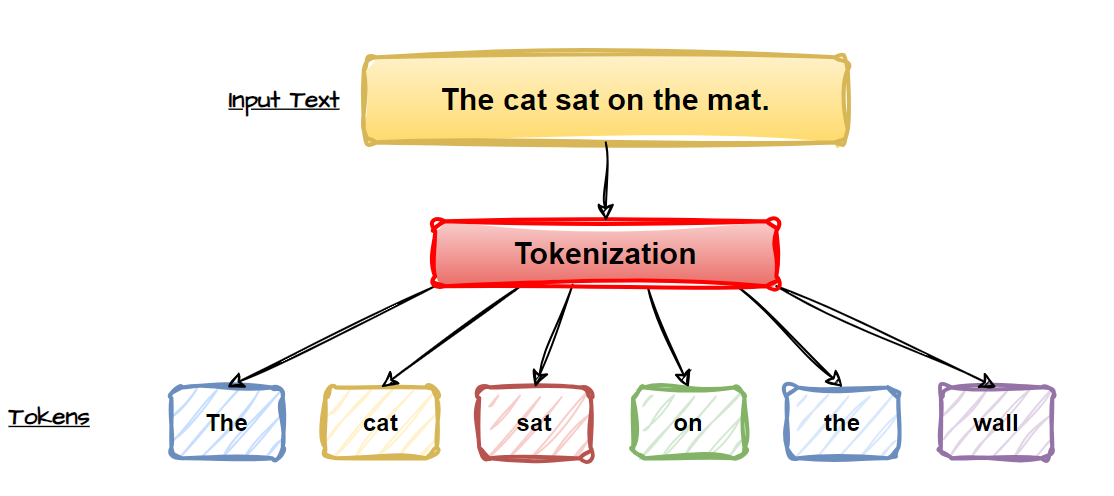

### Step 2: Mapping Tokens to Unique Identifiers

**What Happens**:
- Each token is assigned a unique identifier (index) based on its position in the vocabulary. This vocabulary is a predefined list of all possible tokens that the model can recognize.

**Example**:
- Assume we have the following vocabulary:
  - "The" → 0
  - "cat" → 1
  - "sat" → 2
  - "on" → 3
  - "the" → 4
  - "mat" → 5

- The tokens can now be represented as:
- **Token IDs**: [0, 1, 2, 3, 4, 5]

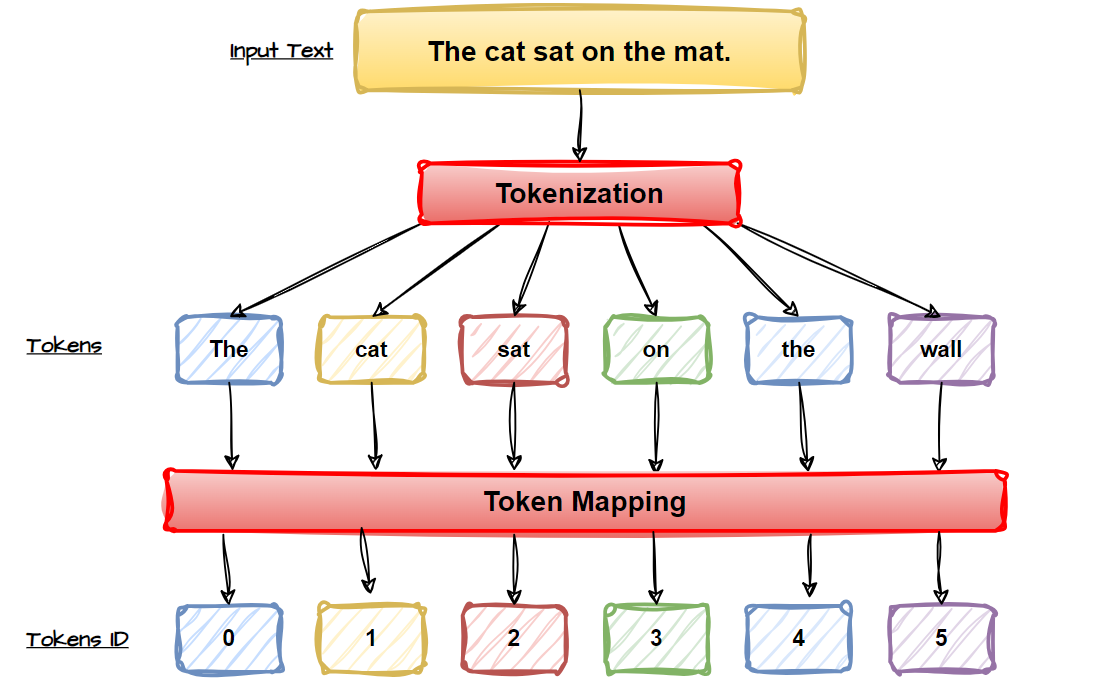

### Step 3: Creating the Embedding Matrix

**What Happens**:
- An embedding matrix is created, where each row corresponds to a token in the vocabulary, and each column represents a dimension in the embedding space. The dimensions are typically much lower than the size of the vocabulary (e.g., 100 or 300 dimensions).

**Example**:
- Suppose we have the following embedding matrix (with random values for illustration):

| Token ID | Embedding Vector          |
|----------|---------------------------|
| 0        | [0.1, 0.2, 0.3]           |
| 1        | [0.4, 0.5, 0.6]           |
| 2        | [0.7, 0.8, 0.9]           |
| 3        | [0.1, 0.4, 0.7]           |
| 4        | [0.1, 0.2, 0.3]           |
| 5        | [0.3, 0.6, 0.9]           |


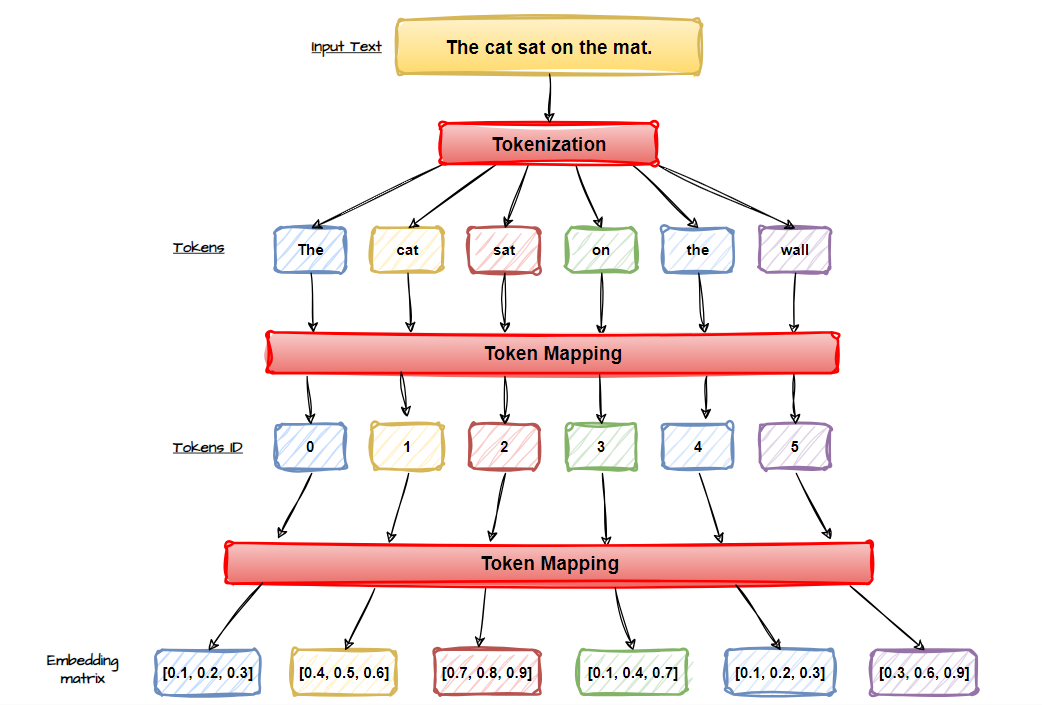

If you observe carefully, first word **`The`** and fifth word **`the`** vector's representation are same, because both are smae right. **`The`** and **`the`** are same words, so vectors also same.

### Step 4: Generating the Embeddings for the Input Sentence

**What Happens**:
- The token IDs for the input sentence are used to look up the corresponding embedding vectors from the embedding matrix. This results in a matrix of embeddings for the entire sentence.

**Example**:
- For our example sentence, the embeddings would be:
```
Input Sentence Embeddings:
[
  [0.1, 0.2, 0.3],  // "The"
  [0.4, 0.5, 0.6],  // "cat"
  [0.7, 0.8, 0.9],  // "sat"
  [0.1, 0.4, 0.7],  // "on"
  [0.1, 0.2, 0.3],  // "the"
  [0.3, 0.6, 0.9]   // "mat"
]
```

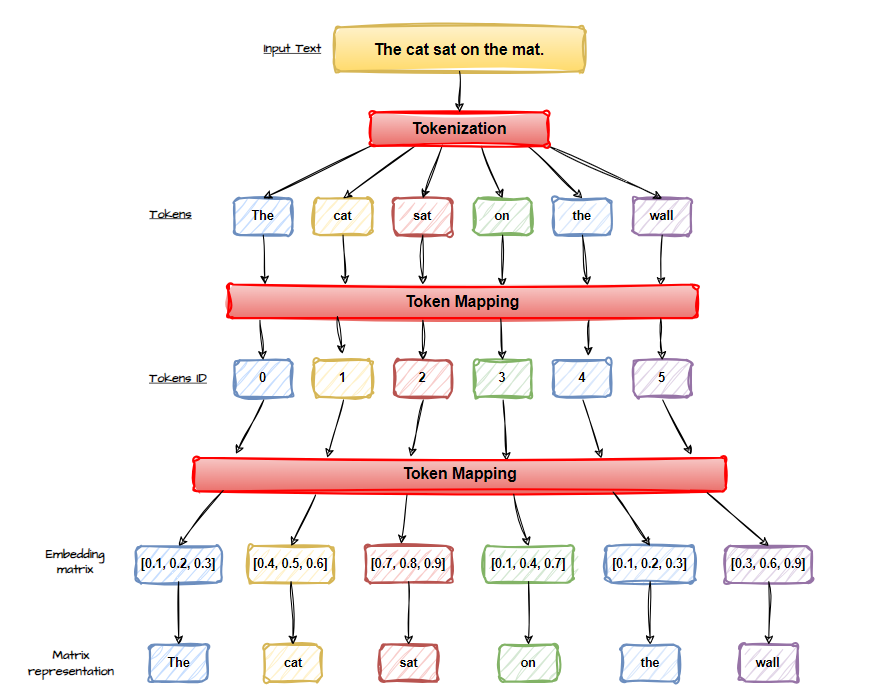

---

## Practical Implementation

In this example, we will use Python with the PyTorch library to demonstrate how to create embeddings for the input sentence.

### Step 1: Setup

First, ensure you have PyTorch installed. You can install it using pip if you haven't done so yet:

In [1]:
!pip install torch

### Step 2: Import Libraries

Now, let’s start by importing the necessary libraries:

In [2]:
import torch
import torch.nn as nn

- `torch` is the main PyTorch library.
- `torch.nn` contains the neural network modules, including the embedding layer.

### Step 3: Define the Vocabulary and Embedding Layer

Next, we will define the vocabulary size and the embedding dimension, and create the embedding layer:

In [3]:
# Define the vocabulary size and embedding dimension
vocab_size = 10  # For simplicity, we will use a small vocabulary
embedding_dim = 4  # Size of each embedding vector

# Create the embedding layer
embedding_layer = nn.Embedding(vocab_size, embedding_dim)

- **Vocabulary Size**: We set a small vocabulary size (10) for this example. In practice, this would be the total number of unique tokens in your dataset.
- **Embedding Dimension**: We choose an embedding dimension of 4, meaning each token will be represented by a 4-dimensional vector.
- **Embedding Layer**: We create an instance of `nn.Embedding`, which initializes the embedding weights randomly.

### Step 4: Tokenization and Mapping to IDs

Next, we will tokenize the input sentence and map the tokens to unique IDs. For simplicity, we will manually define the mapping:

In [4]:
# Example input sentence
sentence = "The cat sat on the mat."

# Manual tokenization and mapping to IDs
tokens = ["The", "cat", "sat", "on", "the", "mat"]
token_to_id = {token: idx for idx, token in enumerate(tokens)}
print("Token to ID mapping:", token_to_id)

# Convert tokens to IDs
token_ids = [token_to_id["The"], token_to_id["cat"], token_to_id["sat"], 
             token_to_id["on"], token_to_id["the"], token_to_id["mat"]]
print("Token IDs:", token_ids)

Token to ID mapping: {'The': 0, 'cat': 1, 'sat': 2, 'on': 3, 'the': 4, 'mat': 5}
Token IDs: [0, 1, 2, 3, 4, 5]


- **Tokenization**: We manually define a list of tokens from the sentence.
- **Mapping to IDs**: We create a dictionary that maps each token to a unique ID using `enumerate()`.
- **Convert Tokens to IDs**: We convert the tokens to their corresponding IDs using the mapping.

### Step 5: Convert Token IDs to Embeddings

Now, we will convert the token IDs into their corresponding embeddings using the embedding layer:

In [5]:
# Convert token IDs to a tensor
input_tensor = torch.tensor(token_ids)

# Get the embeddings for the input tokens
embeddings = embedding_layer(input_tensor)
print("Embeddings:\n", embeddings)

Embeddings:
 tensor([[ 2.5495,  2.1837, -0.6540,  0.4697],
        [ 0.9753,  0.6789,  0.9626, -0.7237],
        [-1.2770,  1.6224,  1.5897, -0.5606],
        [-0.1912,  0.3766,  0.9288, -1.8446],
        [-0.0528, -0.4337,  0.0320, -1.5071],
        [ 0.9814, -0.1622,  1.2935,  0.2622]], grad_fn=<EmbeddingBackward0>)


- **Convert to Tensor**: We convert the list of token IDs into a PyTorch tensor.
- **Get Embeddings**: We pass the tensor of token IDs to the `embedding_layer`, which retrieves the corresponding embedding vectors.
- **Output**: The `embeddings` tensor will have a shape of `(6, 4)`, representing the embeddings for the 6 tokens, each with a 4-dimensional vector.

### Step 6: Print Words with Their Corresponding Embeddings
After retrieving the embeddings, you can use the **`token_to_id`** mapping to print each token alongside its embedding vector. Here’s the additional code to achieve that:

In [6]:
# Print the tokens with their corresponding embeddings
print("Tokens with their Embeddings:")
for token, token_id in token_to_id.items():
    print(f"{token}: {embeddings[token_id].detach().numpy()}")

Tokens with their Embeddings:
The: [ 2.5494626   2.1836805  -0.6540274   0.46965423]
cat: [ 0.97532207  0.6788647   0.96263754 -0.7236505 ]
sat: [-1.2769781   1.6223831   1.5896688  -0.56061673]
on: [-0.19115989  0.3766303   0.92879164 -1.8446202 ]
the: [-0.0528306  -0.43373212  0.03201937 -1.5071114 ]
mat: [ 0.9814359  -0.16224287  1.2935413   0.2622175 ]


- **Loop Through Tokens:** We loop through the **`token_to_id`** dictionary to access each token and its corresponding ID.
- **Retrieve Embeddings:** For each token, we retrieve the embedding using **`embeddings[token_id]`**.
- **Detach and Convert to NumPy**: We use **`detach().numpy()`** to convert the tensor to a NumPy array for easier readability (this is especially useful when working in environments like Jupyter notebooks).
- Finally, we print each token along with its embedding vector.

### Limitations of Embeddings

1. **Fixed Representation**: Traditional embeddings provide a fixed representation for each token, regardless of the context in which the token appears. This can be problematic for words with multiple meanings (polysemy) or words that change meaning based on the context.

2. **Out-of-Vocabulary (OOV) Tokens**: If a token in the input sequence is not present in the vocabulary used to create the embeddings, it is considered an OOV token. These tokens are typically handled by using a special token (like `<UNK>`) or by using subword tokenization techniques.

---

# Positional Encoding in Transformers

While embeddings capture the semantic meaning of tokens, they do not inherently provide information about the order of those tokens in a sequence. This is a critical aspect for understanding context in natural language processing tasks. To address this limitation, transformers use **positional encoding**.

### What is Positional Encoding?

Positional encoding is a technique used to inject information about the position of each token in the input sequence into the embeddings. This allows the transformer model to maintain the order of tokens, which is essential for understanding the context and meaning of sentences.

### Why is Positional Encoding Important?

1. **Order Sensitivity**: In natural language, the order of words significantly affects meaning. For example, "The cat chased the mouse" has a different meaning than "The mouse chased the cat." Positional encoding helps the model recognize and preserve these differences.

2. **Non-Sequential Processing**: Unlike recurrent neural networks (RNNs), which process tokens sequentially and inherently capture order, transformers process the entire sequence simultaneously. Positional encoding compensates for this by adding positional information to the token embeddings.

3. **Contextual Understanding**: By incorporating positional information, transformers can better understand the relationships between tokens based on their positions, leading to improved performance in tasks like translation, summarization, and question answering.

### How Does Positional Encoding Work?

Positional encodings are added to the input embeddings to provide information about the position of each token in the sequence. The encoding is typically generated using sine and cosine functions of different frequencies, allowing the model to encode both absolute and relative position information.

### Mathematical Formulation

The formulas for calculating positional encodings are as follows:

**For each position *pos* and dimension *i*:**

- **For even dimensions:**
  $$
  PE(pos, 2i) = \sin\left(\frac{pos}{10000^{2i/d_{model}}}\right)
  $$
  
 - **For odd dimensions:**

  $$
  PE(pos, 2i+1) = \cos\left(\frac{pos}{10000^{2i/d_{model}}}\right)
  $$

Where:
- *pos* is the position of the token in the sequence (starting from 0).
- *i* is the dimension of the embedding.
- $$d_{model}$$ is the total dimension of the embedding.


So, Positional encoding is a crucial component of the transformer architecture that allows the model to maintain the order of tokens in a sequence. By adding positional information to the embeddings, transformers can effectively capture the relationships between words and understand the context of sentences.

## Practical Implementation

In this example, we will implement positional encoding using the same input sentence "The cat sat on the mat." We will use Python with the PyTorch library to create the positional encodings.

### Step 7: Define Positional Encoding Function

Next, we will create a function to generate positional encodings based on the formulas we discussed earlier.

In [7]:
def positional_encoding(seq_len, d_model):
    # Create a tensor for positional encodings
    pos_enc = torch.zeros(seq_len, d_model)
    
    # Calculate positional encodings
    positions = torch.arange(seq_len, dtype=torch.float).unsqueeze(1)  # Shape (seq_len, 1)
    div_term = torch.exp(torch.arange(0, d_model, 2).float() * -(torch.log(torch.tensor(10000.0)) / d_model))  # Shape (d_model/2,)
    
    pos_enc[:, 0::2] = torch.sin(positions * div_term)  # Apply sine to even indices
    pos_enc[:, 1::2] = torch.cos(positions * div_term)  # Apply cosine to odd indices
    
    return pos_enc

**Explanation**:
1. **Function Definition**: We define a function `positional_encoding` that takes the sequence length (`seq_len`) and the embedding dimension (`d_model`) as inputs.
2. **Tensor Initialization**: We create a tensor `pos_enc` initialized to zeros with shape `(seq_len, d_model)`.
3. **Position Calculation**: We create a tensor of positions using `torch.arange(seq_len)`, which generates values from 0 to `seq_len - 1`, and we use `unsqueeze(1)` to convert it to a column vector.
4. **Divisor Term Calculation**: We calculate the divisor term using exponential decay to ensure that the sine and cosine functions vary smoothly across dimensions.
5. **Sine and Cosine Application**: We apply the sine function to even indices and the cosine function to odd indices of the positional encoding tensor.

### Step 8: Generate Positional Encodings

Now, we will generate the positional encodings for our input sentence.

In [8]:
# Define the sequence length (number of tokens) and embedding dimension
seq_len = len(tokens)  # Number of tokens in the input sentence
d_model = embedding_dim  # Use the same embedding dimension as before

# Generate positional encodings
positional_encodings = positional_encoding(seq_len, d_model)
print("Positional Encodings:\n", positional_encodings)

Positional Encodings:
 tensor([[ 0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0100,  0.9999],
        [ 0.9093, -0.4161,  0.0200,  0.9998],
        [ 0.1411, -0.9900,  0.0300,  0.9996],
        [-0.7568, -0.6536,  0.0400,  0.9992],
        [-0.9589,  0.2837,  0.0500,  0.9988]])


**Explanation**:
1. **Sequence Length**: We set `seq_len` to the number of tokens in our input sentence.
2. **Generate Encodings**: We call the `positional_encoding` function to generate the positional encodings for our input sentence.
3. **Display Results**: We print the resulting positional encodings.

### Step 9: Adding Positional Encodings to Input Embeddings

Finally, we will add the positional encodings to the input embeddings we created earlier.

In [9]:
encoded_embeddings = embeddings + positional_encodings
print("Encoded Embeddings (with Positional Encoding):\n", encoded_embeddings)

Encoded Embeddings (with Positional Encoding):
 tensor([[ 2.5495,  3.1837, -0.6540,  1.4697],
        [ 1.8168,  1.2192,  0.9726,  0.2763],
        [-0.3677,  1.2062,  1.6097,  0.4392],
        [-0.0500, -0.6134,  0.9588, -0.8451],
        [-0.8096, -1.0874,  0.0720, -0.5079],
        [ 0.0225,  0.1214,  1.3435,  1.2610]], grad_fn=<AddBackward0>)


**Explanation**:
1. **Adding Encodings**: We add the positional encodings to the input embeddings. This operation combines the semantic information from the embeddings with the positional information, resulting in context-aware embeddings.
2. **Display Results**: We print the final encoded embeddings.

## What We Have Covered Today

- Learned about embeddings and how they represent words
- Saw how to create embeddings using PyTorch
- Understood the importance of positional encoding 
- Implemented positional encoding in code
- Printed out the final encoded embeddings

### The key takeaways are:
- Embeddings capture the meaning of words 
- Positional encoding adds position info to embeddings
- Combining them gives context-aware representations